In [127]:
# importing packages
import numpy as np
from matplotlib import pyplot as plt
import math
import scipy.stats as stats
import pandas as pd

Relationship Between Equivalent Conductivity and Specific Conductivity

Specific conductivity = equivalent conductivity*concentration/1000

Where the concentration is in equivalent per litre and equivalent conductivity in centimeter squared per Ohm per equivalent

In [128]:
# loading NaCl equivalent conductivity data
equiv_data = pd.read_csv("NaCl_equiv.csv")
molar_conc_equiv = equiv_data["Conc_mM"]
equiv_cond = equiv_data["Equiv_cond(cm2/Ohm/equiv)"]

# number of data points
ndata = len(equiv_cond)

# converting the concentrations in mM to equivalent per litre
equiv_conc = [molar_conc_equiv[i]*10**(-3)*1 for i in range(ndata)]

# specific conductivity in Siemen per cm
specific_cond = [equiv_cond[i]*equiv_conc[i]/1000 for i in range(ndata)]

# specific conductivity in micro Siemen per cm
specific_cond_calc = [specific_cond[i]*10**6 for i in range(ndata)]

# creating dataframe
input_output = [molar_conc_equiv, specific_cond_calc]
conc_cond = np.transpose(input_output)
column_names = ["Conc (mM)", "Calc cond (uS/cm)"]
specific_cond_calc_NaCl = pd.DataFrame(conc_cond, columns=column_names)

print(specific_cond_calc_NaCl)

   Conc (mM)  Calc cond (uS/cm)
0        0.0              0.000
1        0.5             62.255
2        1.0            123.750
3        2.0            245.360
4        5.0            603.400
5       10.0           1185.700
6       20.0           2316.200
7       50.0           5551.500
8      100.0          10652.000


In [129]:
# loading NaCl specific conductivity data
specific_data = pd.read_csv("NaCl.csv")
molar_conc_specific = specific_data["NaCl conc"]
specific_cond_exp = specific_data["NaCl cond"]

# number of data points
ndata2 = len(specific_cond_exp)

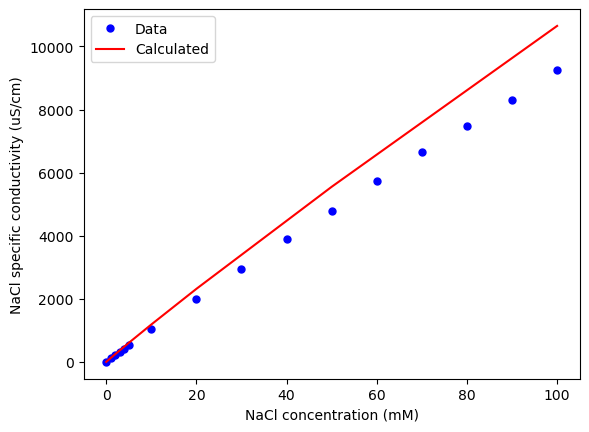

In [130]:
# making plot comparison of data and calculated values
plt.plot(molar_conc_specific, specific_cond_exp, "b.", markersize=10, label="Data")
plt.plot(molar_conc_equiv, specific_cond_calc, "r-", label="Calculated")
plt.xlabel("NaCl concentration (mM)")
plt.ylabel("NaCl specific conductivity (uS/cm)")
plt.legend()
plt.show()

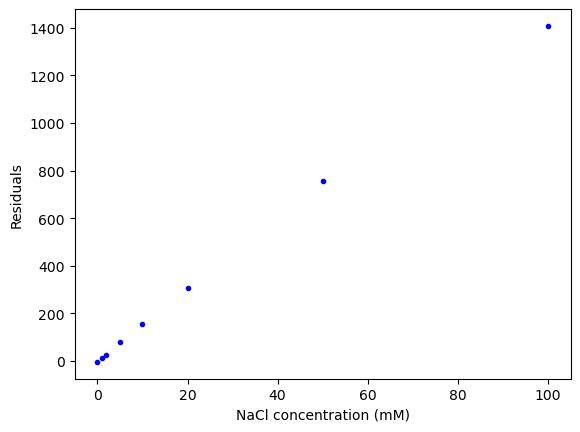

In [131]:
# residuals
residuals = []

# molar concentration of equivalent data that has a residual
molar_conc_equiv_res = []

# converting molar concentration to list
molar_conc_equiv2 = list(molar_conc_equiv)
molar_conc_specific2 = list(molar_conc_specific)

# looping through molar concentrations of equivalent and specific data and then taking residuals of same molar concentrations
for conc in molar_conc_equiv2:
    for conc2 in molar_conc_specific2:
        if conc == conc2:
            molar_conc_equiv_res.append(conc)
            index_conc = molar_conc_equiv2.index(conc)
            index_conc2 = molar_conc_specific2.index(conc2)
            residual = specific_cond_calc[index_conc] - specific_cond_exp[index_conc2]
            residuals.append(residual)
        else:
            pass

# making plot of residuals of calculated specific conductivity
plt.plot(molar_conc_equiv_res, residuals, "b.")
plt.xlabel("NaCl concentration (mM)")
plt.ylabel("Residuals")
plt.show()

Calcium Chloride

In [132]:
# loading CaCl2 equivalent conductivity data
equiv_data = pd.read_csv("CaCl2_equiv.csv")
molar_conc_equiv = equiv_data["CaCl2_conc_mM"]
equiv_cond = equiv_data["CaCl2_equiv_cond(cm2/Ohm/equiv)"]

# number of data points
ndata = len(equiv_cond)

# converting the concentrations in mM to equivalent per litre
equiv_conc = [molar_conc_equiv[i]*10**(-3)*2 for i in range(ndata)]

# specific conductivity in Siemen per cm
specific_cond = [equiv_cond[i]*equiv_conc[i]/1000 for i in range(ndata)]

# specific conductivity in micro Siemen per cm
specific_cond_calc = [specific_cond[i]*10**6 for i in range(ndata)]

# creating dataframe
input_output = [molar_conc_equiv, specific_cond_calc]
conc_cond = np.transpose(input_output)
column_names = ["Conc (mM)", "Calc cond (uS/cm)"]
specific_cond_calc_CaCl2 = pd.DataFrame(conc_cond, columns=column_names)

print(specific_cond_calc_CaCl2)

    Conc (mM)  Calc cond (uS/cm)
0        0.00               0.00
1        0.25              66.01
2        0.50             130.52
3        1.00             256.94
4        1.50             380.79
5        2.50             623.25
6        3.50             859.95
7        5.00            1206.90
8       10.00            2313.00
9       25.00            5359.50
10      50.00            9952.00


In [133]:
# loading CaCl2 specific conductivity data
specific_data = pd.read_csv("CaCl2.csv")
molar_conc_specific = specific_data["CaCl2_conc"]
specific_cond_exp = specific_data["CaCl2_cond"]

# number of data points
ndata2 = len(specific_cond_exp)

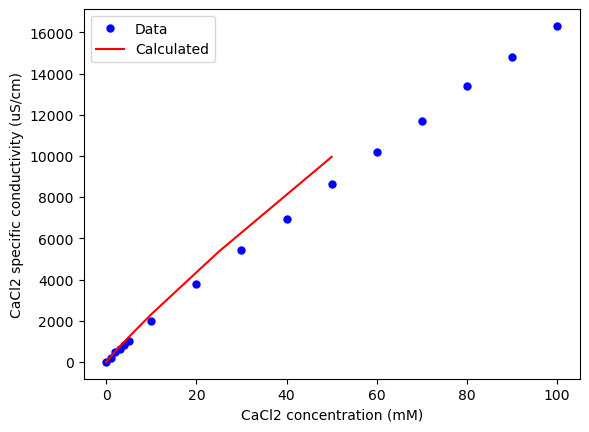

In [134]:
# making plot comparison of data and calculated values
plt.plot(molar_conc_specific, specific_cond_exp, "b.", markersize=10, label="Data")
plt.plot(molar_conc_equiv, specific_cond_calc, "r-", label="Calculated")
plt.xlabel("CaCl2 concentration (mM)")
plt.ylabel("CaCl2 specific conductivity (uS/cm)")
plt.legend()
plt.show()

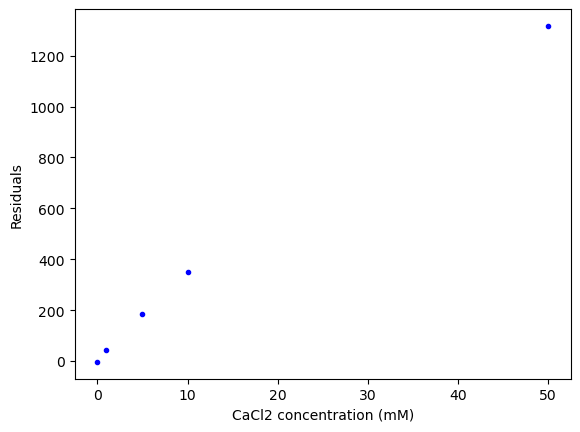

In [135]:
# residuals
residuals = []

# molar concentration of equivalent data that has a residual
molar_conc_equiv_res = []

# converting molar concentration to list
molar_conc_equiv2 = list(molar_conc_equiv)
molar_conc_specific2 = list(molar_conc_specific)

# looping through molar concentrations of equivalent data and specific data and taking the residuals of same molar concentrations
for conc in molar_conc_equiv2:
    for conc2 in molar_conc_specific2:
        if conc == conc2:
            molar_conc_equiv_res.append(conc)
            index_conc = molar_conc_equiv2.index(conc)
            index_conc2 = molar_conc_specific2.index(conc2)
            residual = specific_cond_calc[index_conc] - specific_cond_exp[index_conc2]
            residuals.append(residual)
        else:
            pass

# making plot of residuals of calculated specific conductivity
plt.plot(molar_conc_equiv_res, residuals, "b.")
plt.xlabel("CaCl2 concentration (mM)")
plt.ylabel("Residuals")
plt.show()

Calculated Bulk Conductivity of NaCl and CaCl2

In [136]:
# calculated bulk conductivity evaluated as sum of individual salts conductivity
calc_bulk_cond = []

# molar concentrations common to both NaCl and CaCl2
equal_conc = []

# CaCl2 concentration and conductivity
conc_CaCl2 = list(specific_cond_calc_CaCl2["Conc (mM)"])
cond_CaCl2 = specific_cond_calc_CaCl2["Calc cond (uS/cm)"]

# NaCl concentration and conductivity
conc_NaCl = list(specific_cond_calc_NaCl["Conc (mM)"])
cond_NaCl = specific_cond_calc_NaCl["Calc cond (uS/cm)"]

# looping through calcium chloride concentration
for i in conc_CaCl2:
    # looping through sodium chloride concentration
    for j in conc_NaCl:
        if i == j:
            equal_conc.append(i)
            index_conc_CaCl2 = conc_CaCl2.index(i)
            index_conc_NaCl = conc_NaCl.index(j)
            sum_cond = cond_CaCl2[index_conc_CaCl2] + cond_NaCl[index_conc_NaCl]
            calc_bulk_cond.append(sum_cond)
        else:
            pass


In [137]:
# loading NaCl and CaCl2 specific conductivity data
specific_data = pd.read_csv("NaCl_CaCl2_eq.csv")
CaCl2_conc = specific_data["CaCl2_conc"]
NaCl_conc = specific_data["NaCl_conc"]
bulk_cond = specific_data["Bulk_cond"]

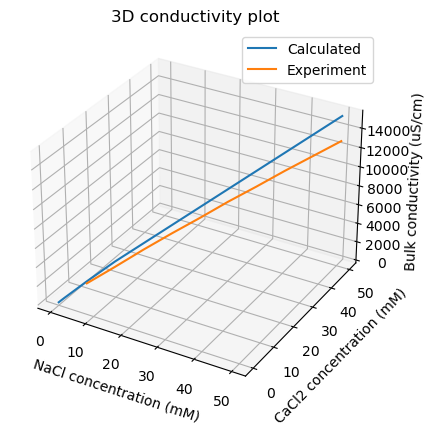

In [138]:
# making plot comparison of calculated and experimental bulk conductivity
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# plotting
ax.plot3D(equal_conc, equal_conc, calc_bulk_cond, label="Calculated")
ax.plot3D(NaCl_conc, CaCl2_conc, bulk_cond, label="Experiment")
ax.set_title('3D conductivity plot')
ax.set_zlabel("Bulk conductivity (uS/cm)")
ax.set_xlabel("NaCl concentration (mM)")
ax.set_ylabel("CaCl2 concentration (mM)")
ax.legend()
plt.show()